# Insurance Cross Sell Prediction
## Project Plan
This project aims at building a model to predict whether the policy holders clients from past year will also be interested in Vehicle Insurance provided by the company.
## Business Problem
TruSecure insurance company is looking to expand its services by offering vehicle insurance policies. The company needs help in developing a predictive model to determine whether existing health insurance policyholders are likely to show interest in purchasing a vehicle insurance policy as well.

To support this business goal,  analyze customer data from the past year — including demographics, risk indicators, and policy history — to build a reliable model that predicts conversion likelihood. In addition to predictive modeling, provide business insights and strategic recommendations to help the company design effective marketing campaigns and ensure that policy offerings are inclusive, fair, and aligned with customer behavior.
## Business Objectives

1.**Identify Key Factors Influencing Purchase Decisions**   


Analyze the most important features (e.g., age, gender, policy channel, vehicle damage) that influence customer decisions to buy vehicle insurance.                                                                                                                                                                                                                                            
2.**Segment Customers for Targeted Marketing**                                                                        
Group customers into meaningful segments based on age, risk indicators, and policy history to improve marketing efficiency.

3.**Predict whether a customer will respond positively to an insurance offer**                                                                               
Develop a predictive model to determine whether a customer is likely to purchase a vehicle insurance policy based on demographic and historical data.

4.**Provide Actionable Business Insights**
Recommend data-driven strategies for improving cross-sell conversion rates and optimizing policy offerings and sales channels


## Data Overview
The Dataset used in this project is Health Insurance Cross Sell Prediction dataset which is availale in kaggle.
It contains important information about past clients details that may influence their decisions to purchasing vehicle insurance.
The dataset has 508,146 row and 12 columns. However, for effective modelling, the dataset has been divided into training dataset and testing dataset. The testing dataset therefore lacks our target column which is " Response" column ,
Some of the Key columns include:
1. Gender - Gender of Client
2. Age - Age of client
3. Driving_License - Whether the client has Driving licences or not. Yes = 1 and No = 0
4. Region_Code - The Region Code where the client is located
5. Previously_Insured - Whether the client had been previously insured by our company. Yes =1 and No = 0
6. Vehicle_Age - Whether vehicle age is above 2 years, between 1 and 2 years and below 1 year
7. Vehicle_Damage - whether client had damaged vehicle Yes/No
8. Annual_Premium - The total amount of money the client should pay per year.
9. Policy_Sales_Channel	- The channel used to engage and get response from clients. It is represented by anonimous code
10. Vintage - The number of days the client has been registered in the company
11. Response - This is the positive or negative response by the client. Positive response = 1 and negative response = 0


### Load the datasets using Pandas

In [2]:
import pandas as pd
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#submission_df=pd.read_csv('sample_submission.csv')


In [3]:
# Display the First 5 rows of train data set
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Display the First 5 rows of test data set
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
# Lets check information about the data types and general information of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


From the above, we realize that we have categorical data ( Dtype = object ) that we must encode so that it may those columns for modelling.

### Check for null values and duplicates

In [6]:

def check_dupli_null(train_df):
    null_values = train_df.isnull().sum()
    duplicates = train_df.duplicated().sum()
    
    return {
        "null_values": null_values,
        "duplicate_count": duplicates
    }

check_dupli_null(train_df)

{'null_values': id                      0
 Gender                  0
 Age                     0
 Driving_License         0
 Region_Code             0
 Previously_Insured      0
 Vehicle_Age             0
 Vehicle_Damage          0
 Annual_Premium          0
 Policy_Sales_Channel    0
 Vintage                 0
 Response                0
 dtype: int64,
 'duplicate_count': 0}

Our data was clean with no missing values and ndo duplicates also, so we will go directly to **Explanatory Data Analysis**

## Explanatory Data Analysis

Before we begin with the analysis, we can check the distribution of some features such as age.

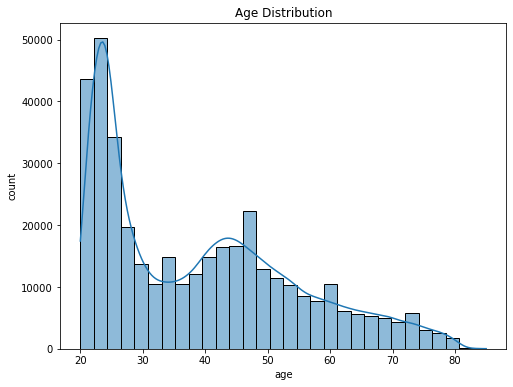

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(train_df['Age'],bins = 30, kde = True)

plt.xlabel("age")
plt.ylabel("count")
plt.title("Age Distribution")
plt.show()

**Intepretation**                                                                                                               
Right-skewed Distribution:
* The majority of the population is concentrated at younger ages, especially in the 20–30 range.
* The count sharply peaks near age 23–25 and then gradually declines.
* However, there are smaller peaks (bumps) around ages 40–50 and 60, indicating possible subgroups or cohorts in those age ranges.                                                                                                                     

Therefore, when performing modelling we should consider doing log transformation to Age column so that we reshape its distribution or enhance model performance.

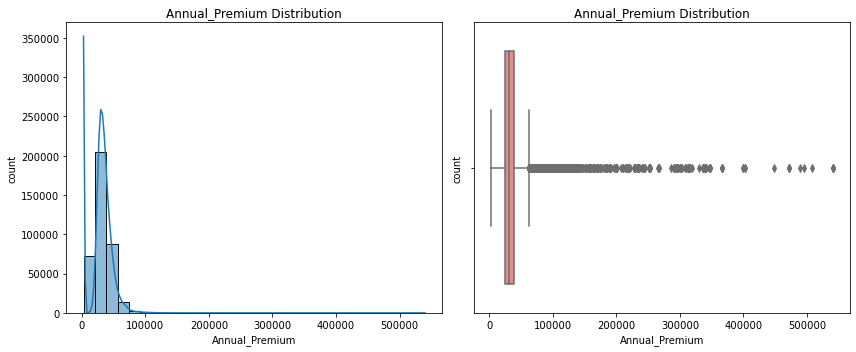

In [8]:


#histgram of distribution of Annual_Premium
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=train_df['Annual_Premium'],bins = 30, kde = True)

plt.xlabel("Annual_Premium")
plt.ylabel("count")
plt.title("Annual_Premium Distribution")

# Boxplot for Annual_premium
plt.subplot(1,2,2)
sns.boxplot(x=train_df['Annual_Premium'],color="lightcoral")
plt.xlabel("Annual_Premium")
plt.ylabel("count")
plt.title("Annual_Premium Distribution")


plt.tight_layout()
plt.show()

#### Check for Outliers in the Annual_premium column

In [9]:
Q1 = train_df['Annual_Premium'].quantile(0.25)
Q3 = train_df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = train_df[(train_df['Annual_Premium'] < lower_bound) | (train_df['Annual_Premium'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {100 * len(outliers) / len(train_df):.2f}%")


Number of outliers: 10320
Percentage of outliers: 2.71%


#### Since we have some outliers we can decide to deal with them through Cap (Winsorize).
 This is replacing the extreme values with upper/lower bounds

In [10]:
train_df['Annual_Premium_Capped'] = train_df['Annual_Premium'].clip(lower=lower_bound, upper=upper_bound)
test_df['Annual_Premium_Capped'] = test_df['Annual_Premium'].clip(lower=lower_bound, upper=upper_bound)


#### For Easier Checking of Outliers in other columns, let's create a fuction for detecting If present

In [11]:
def check_outliers(df, feature):
    """
    Checks for outliers in a given feature using the IQR method.
    
    Parameters:
    - df: DataFrame
    - feature: Column name (string)
    
    Prints:
    - Number and percentage of outliers
    - IQR bounds used for detection
    """
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {100 * len(outliers) / len(df):.2f}%")
    print(f"IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")


In [12]:
check_outliers(train_df,"Age")


Feature: Age
Number of outliers: 0
Percentage of outliers: 0.00%
IQR bounds: [-11.00, 85.00]


### 1. Group  insurance status and Annual_premium level to check the customer response rate.

In [13]:


#  First, Bin the Annual_Premium to make grouping more meaningful
train_df['Premium_Bin'] = pd.qcut(train_df['Annual_Premium'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Group by Region_Code, Previously_Insured, and Premium_Bin
grouped = train_df.groupby(['Region_Code', 'Previously_Insured', 'Premium_Bin'])['Response'].agg(['count', 'mean']).reset_index()

# Rename columns for clarity
grouped.columns = ['Region_Code', 'Previously_Insured', 'Premium_Bin', 'Lead_Count', 'Response_Rate']

# Sort to see highest response groups first
grouped_sorted = grouped.sort_values(by='Response_Rate', ascending=False)

# Display top rows
grouped_sorted.head()


,Region_Code,Previously_Insured,Premium_Bin,Lead_Count,Response_Rate
387,48.0,0,Very High,1,1.000000
10,1.0,0,High,1,1.000000
251,31.0,0,Very High,1,1.000000
162,20.0,0,High,3,0.666667
3,0.0,0,Very High,10,0.600000


In [85]:
grouped.to_csv('premium_region_insurance_summary.csv', index=False)


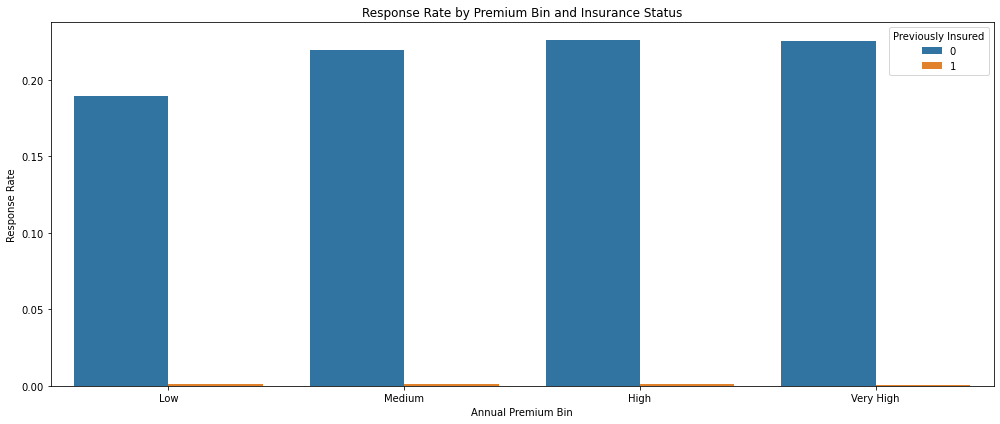

In [14]:

grouped = (
    train_df.groupby(['Region_Code', 'Previously_Insured', 'Premium_Bin'])['Response']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'count': 'Lead_Count', 'mean': 'Response_Rate'})
)

# Plotting: Response Rate by Premium Bin and Previously Insured status
plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped,
    x='Premium_Bin',
    y='Response_Rate',
    hue='Previously_Insured',
    ci=None
)

plt.title('Response Rate by Premium Bin and Insurance Status')
plt.ylabel('Response Rate')
plt.xlabel('Annual Premium Bin')
plt.legend(title='Previously Insured')
plt.tight_layout()
plt.show()


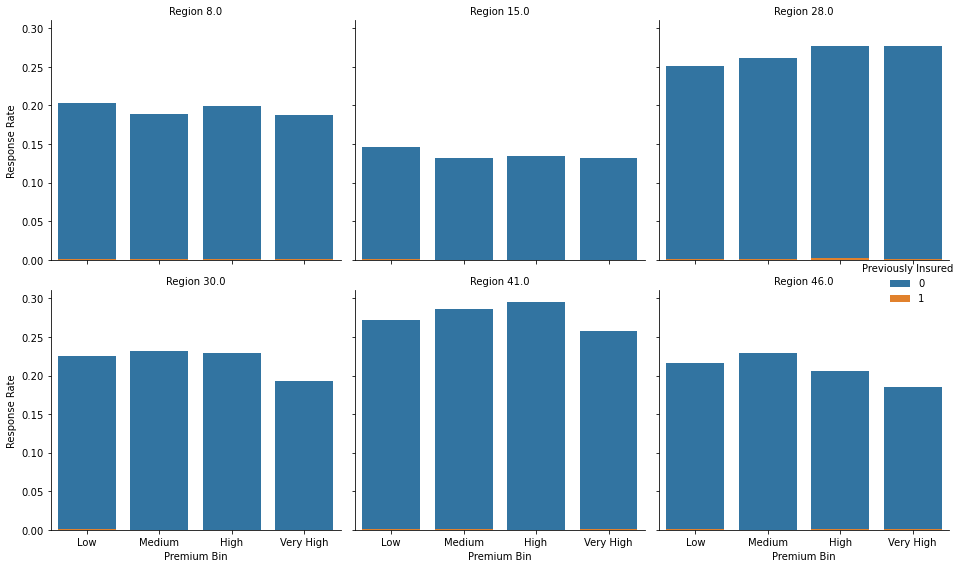

In [15]:


# Only show top N most populated regions to keep things readable
top_regions = (
    grouped.groupby('Region_Code')['Lead_Count']
    .sum()
    .sort_values(ascending=False)
    .head(6)  # choose how many regions to show
    .index
)

# Filter to only those top regions
filtered = grouped[grouped['Region_Code'].isin(top_regions)]

# Set up FacetGrid
g = sns.FacetGrid(
    filtered,
    col='Region_Code',
    hue='Previously_Insured',
    col_wrap=3,
    height=4,
    sharey=True
)

g.map(sns.barplot, 'Premium_Bin', 'Response_Rate', order=['Low', 'Medium', 'High', 'Very High'])
g.add_legend(title="Previously Insured")
g.set_titles("Region {col_name}")
g.set_axis_labels("Premium Bin", "Response Rate")

plt.tight_layout()
plt.show()


### Findings 
From the abvove we see :                                                                                                    
* Those that were not previously_Insured( Previously_Insured= 0) clients have significantly higher response rates than those already insured (Previously_Insured = 1).
* In region code 28, clients with higher premium have higher response.
* Region 15 have lower response rate at all premium stages

Business implication:                                                                                             
* Focus marketing on those not currently insured — they’re much more receptive to offers.                                  
* Marketing can be increased in region 15 since they have a lower response rate yet top populated at all premium                levels.Discounts can be offered


### 2. Top 10 Policy Sales Channels
Let us see the top 10 performing channels

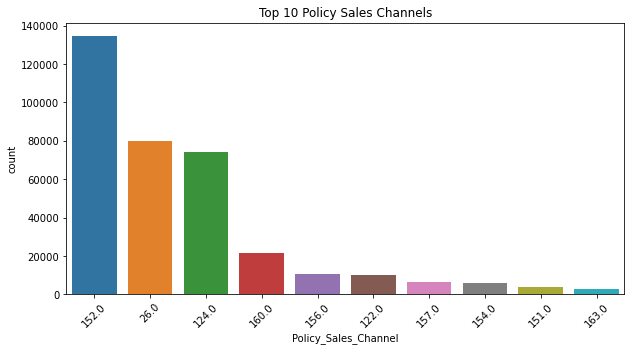

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='Policy_Sales_Channel', order=train_df['Policy_Sales_Channel'].value_counts().index[:10])
plt.title("Top 10 Policy Sales Channels")
plt.xticks(rotation=45)
plt.show()


### Hypothesis Testing to Check if there is Statistical difference in response rate across channels
**Null Hypothesis (H₀):**                                                                                                     
The rate of response is the same across the top 10 policy sales channels.                                                       

**Alternative Hypothesis (H₁):**                                                                                               
At least one sales channel has a significantly different response rate.

In [19]:
from scipy.stats import chi2_contingency
import pandas as pd
top_10_channels = train_df['Policy_Sales_Channel'].value_counts().index[:10]
df_top_channels = train_df[train_df['Policy_Sales_Channel'].isin(top_10_channels)]


# Create a contingency table of channel vs response (0/1)
contingency_table = pd.crosstab(df_top_channels['Policy_Sales_Channel'], df_top_channels['Response'])


# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")


Chi2 Statistic: 25201.821917881323
P-value: 0.0


### Interpretation
**We Reject the Null Hypothesis**                                                                                              
From the above hypothesis testing, there is a statistically significant difference in response rates among the top 10 channels since our p value is less than our significance level of 0.05

### Findings
* Channel 152 is on the lead with high counts as well as higher response rate followed by Channel 26                                                               
* This channels can be used for marketing in places whhere we have a lower response rate

### 3. Response Rate By Age group and Gender
First, we divide age into different Age groups and thereafter we group by gender to check how they correspond to response rate

In [22]:

# Group by Age (binned), Gender, and Policy_Sales_Channel
train_df['Age_Bin'] = pd.cut(train_df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

grouped = train_df.groupby(['Age_Bin', 'Gender', 'Policy_Sales_Channel'])['Response'].agg(['count', 'mean']).reset_index()
grouped.rename(columns={'count': 'Lead_Count', 'mean': 'Response_Rate'}, inplace=True)

# Show top rows
print(grouped.sort_values(by='Response_Rate', ascending=False).head(10))


     Age_Bin  Gender  Policy_Sales_Channel  Lead_Count  Response_Rate
712      40s  Female                  97.0           1            1.0
395      30s  Female                  90.0           1            1.0
535      30s    Male                  73.0           1            1.0
822      40s    Male                  49.0           1            1.0
738      40s  Female                 123.0           1            1.0
801      40s    Male                  28.0           1            1.0
480      30s    Male                  17.0           1            1.0
280      20s    Male                 130.0           1            1.0
1462     60s    Male                  69.0           1            1.0
550      30s    Male                  90.0           1            1.0


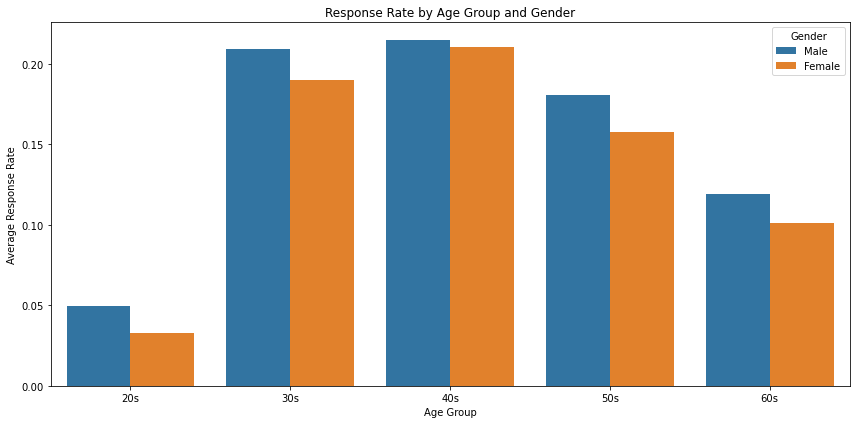

In [44]:


# Create age bins
train_df['Age_Bin'] = pd.cut(train_df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])
test_df['Age_Bin'] = pd.cut(test_df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

# Filter top 5 most common policy channels (optional but helps readability)
top_channels = train_df['Policy_Sales_Channel'].value_counts().head(5).index
filtered_df = train_df[train_df['Policy_Sales_Channel'].isin(top_channels)]

# Plot response rate by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_df,
    x='Age_Bin',
    y='Response',
    hue='Gender',
    ci=None
)
plt.title('Response Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Response Rate')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### Findings
1. Middle-aged groups (30s to 50s) show higher response rates                                                               
* These age bins tend to have higher average response rates compared to the younger (20s) or older (60s) age groups.

* These individuals may be more financially stable and likely to consider purchasing insurance.

2. Gender differences are minimal.
* However, men dominate the response rate.
Our plot shows minimal difference, gender may not be a strong differentiator in overall conversion.

3. 20s and 60s have the lowest response rates
* Customers under 30 or over 60 are less likely to respond positively.
* Younger individuals may feel less need for insurance.
* Older individuals may already be insured or face premium/eligibility barriers.


### 4. Region Code Vs Response
We examine different regions and see how clients respond.

In [28]:
region_response = train_df.groupby('Region_Code')['Response'].agg(['count', 'mean']).reset_index()
region_response.columns = ['Region_Code', 'Lead_Count', 'Response_Rate']
region_response = region_response.sort_values('Response_Rate', ascending=False)
region_response.head()

,Region_Code,Lead_Count,Response_Rate
38,38.0,2026,0.192004
28,28.0,106415,0.187163
19,19.0,1535,0.162866
4,4.0,1801,0.158245
23,23.0,1960,0.153061


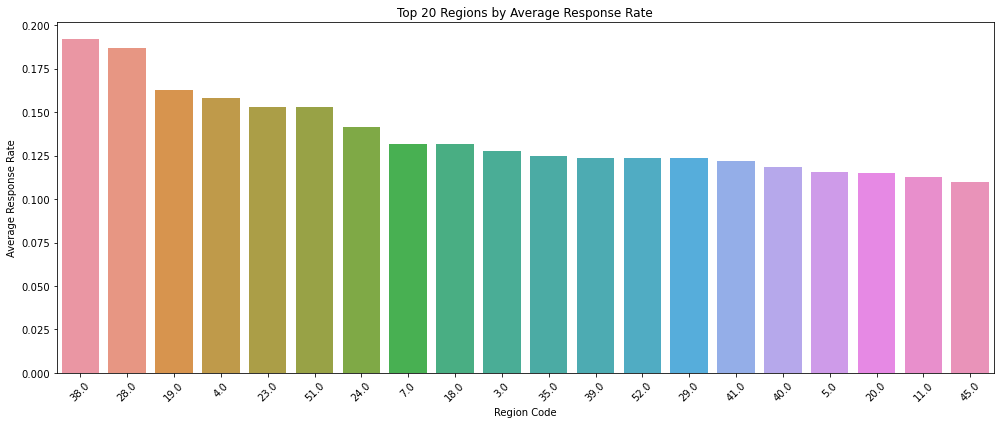

In [29]:
region_top20 = region_response.sort_values(by='Response_Rate', ascending=False).head(20)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=region_top20,
    x='Region_Code',
    y='Response_Rate',
    order=region_top20['Region_Code']
)
plt.xticks(rotation=45)
plt.title('Top 20 Regions by Average Response Rate')
plt.xlabel('Region Code')
plt.ylabel('Average Response Rate')
plt.tight_layout()
plt.show()


### Findings                                                                                                                                                        
Region 38, 28, and 19 have the highest conversion or response rate                                                             
Customers in those regions are more likely to purchase a policy.  

**Insight and Recommended Action**          
* These regions may have more receptive audiences, better-targeted marketing, or stronger sales agents.
* Therefore, double down on these regions with more budget, salesforce allocation, or tailored campaigns.


### Top 10 Policy Channels by Response Rate
Finally on analysis, we examine which are the best perfoming channels to reach out to clients.                                                      
The anonimous code represent channels such as emails or direct messages

In [30]:
channel_summary = train_df.groupby('Policy_Sales_Channel')['Response'].agg(['count', 'mean']).reset_index()
channel_summary.columns = ['Policy_Sales_Channel', 'Lead_Count', 'Response_Rate']
channel_summary = channel_summary.sort_values('Response_Rate', ascending=False)
channel_summary.head()

,Policy_Sales_Channel,Lead_Count,Response_Rate
118,123.0,1,1.000000
41,43.0,1,1.000000
25,27.0,3,0.333333
26,28.0,3,0.333333
34,36.0,52,0.326923


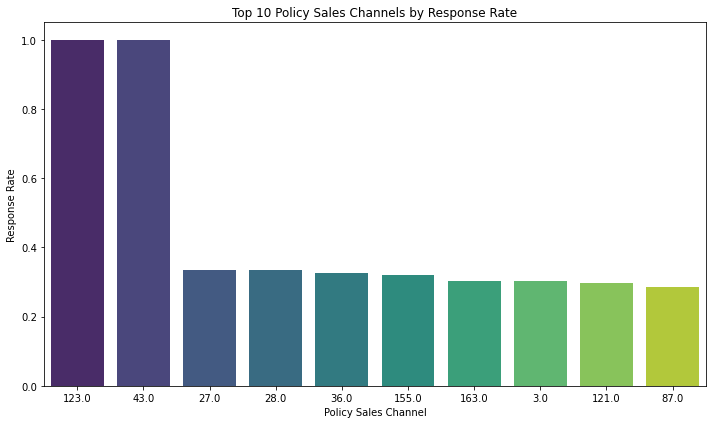

In [31]:

top10_channels = channel_summary.sort_values('Response_Rate', ascending=False).head(10)

# Plot

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_channels,
    x='Policy_Sales_Channel',
    y='Response_Rate',
    palette='viridis',
    order=top10_channels['Policy_Sales_Channel']  # Ensures descending order
)
plt.title('Top 10 Policy Sales Channels by Response Rate')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Response Rate')
plt.tight_layout()
plt.show()


#### Findings and interpretation
* From the plot, channel 123 and 43 attract high number of customers.
* Likely they are operated by more skilled or better-trained agents 

**Recommendation**                                                                                    
Invest more in these channels, by boosting marketing expenditure, incentives, or priority access to these leads.



# Modelling
## Data Preprocessing

In [32]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Capped,Premium_Bin,Age_Bin
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40454.0,Very High,40s
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,33536.0,High,NaN
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,38294.0,High,40s
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,28619.0,Medium,20s
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,27496.0,Medium,20s


In [33]:
# First I will drop ID columns since its not helpful for the model to learn patterns
train_df=train_df.drop(columns=['id'])
test_df=test_df.drop(columns=['id'])

<AxesSubplot:>

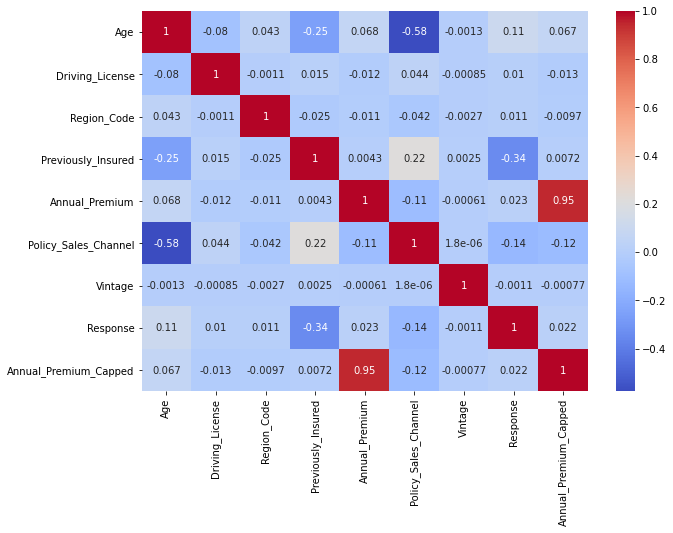

In [34]:
# Next we see the correlation of features
plt.figure(figsize=(10,7))
sns.heatmap(train_df.corr(),annot=True,cmap='coolwarm')

### Encode Categorical Data

In [39]:
# Fisrt, Ensure consistent formatting in string columns:
train_df['Gender'] = train_df['Gender'].str.strip().str.title()
train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].str.strip().str.title()
train_df['Vehicle_Age'] = train_df['Vehicle_Age'].str.strip()

In [40]:
# Set Up Encoders
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Define which columns to encode
onehot_features = ['Gender', 'Vehicle_Damage']
ordinal_feature = ['Vehicle_Age']

# Define order for Vehicle_Age
ordinal_mapping = [['< 1 Year', '1-2 Year', '> 2 Years']]

# Create column transformer
encoder = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), onehot_features),  # drop='first' avoids dummy trap
    ('ordinal', OrdinalEncoder(categories=ordinal_mapping), ordinal_feature)
], remainder='passthrough')  # keep other columns unchanged


In [60]:
# Clean test_df same way
X_test['Gender'] = X_test['Gender'].str.strip().str.title()
X_test['Vehicle_Damage'] = X_test['Vehicle_Damage'].str.strip().str.title()
X_test['Vehicle_Age'] = X_test['Vehicle_Age'].str.strip()
#X_test=test_df

# Apply the previously fitted encoder
X_test_encoded_df= encoder.transform(X_test)


In [65]:
# Get column names from OneHotEncoder part
onehot_columns = encoder.named_transformers_['onehot'].get_feature_names(['Gender', 'Vehicle_Damage'])
all_columns = list(onehot_columns) + ['Vehicle_Age'] + [col for col in X_test.columns if col not in ['Gender', 'Vehicle_Damage', 'Vehicle_Age']]

X_encoded_df = pd.DataFrame(X_encoded, columns=all_columns)


X_test_encoded_df = pd.DataFrame(X_test_encoded_df, columns=all_columns)
# Combine all column names


### Scaling

In [66]:
columns_to_scale = ['Age', 'Annual_Premium', 'Vintage', 'Policy_Sales_Channel', 'Region_Code']
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform on train data
X_encoded_df[columns_to_scale] = scaler.fit_transform(X_encoded_df[columns_to_scale])
X_test_encoded_df[columns_to_scale] = scaler.transform(X_test_encoded_df[columns_to_scale])

### Modelling


In [67]:
from sklearn.model_selection import train_test_split

# Define target and features
X = X_encoded_df
y = train_df['Response']  # original target column from train_df

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_val)


# Get predicted probabilities for the positive class
y_prob_logreg = logreg.predict_proba(X_val)[:, 1]

# Compute and print ROC AUC score
roc_auc = roc_auc_score(y_val, y_prob_logreg)



# Evaluate
print("Logistic Regression Results:")
print(confusion_matrix(y_val, y_pred_logreg))
print(classification_report(y_val, y_pred_logreg))
print(f"ROC AUC Score: {roc_auc:.4f}")


Logistic Regression Results:
[[66853    27]
 [ 9324    18]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.40      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.64      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222

ROC AUC Score: 0.8342


In [77]:
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train on resampled data
#rf.fit(X_resampled, y_resampled)

# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
rf.fit(X_resampled, y_resampled)
# Predict
y_pred_rf = rf.predict(X_val)


# Get predicted probabilities for the positive class
y_prob_rf = rf.predict_proba(X_val)[:, 1]

# Compute and print ROC AUC score
roc_auc_rf = roc_auc_score(y_val, y_prob_rf)



# Evaluate
print("Random Forest Results:")
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")


Random Forest Results:
[[60878  6002]
 [ 6301  3041]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     66880
           1       0.34      0.33      0.33      9342

    accuracy                           0.84     76222
   macro avg       0.62      0.62      0.62     76222
weighted avg       0.84      0.84      0.84     76222

Random Forest ROC AUC Score: 0.8305


In [80]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]), use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_val, xgb.predict_proba(X_val)[:,1]))



[12:45:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[46148 20732]
 [  899  8443]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66880
           1       0.29      0.90      0.44      9342

    accuracy                           0.72     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.72      0.76     76222

ROC AUC Score: 0.8557511715560944


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Set up randomized search
rf_random = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the search on training data
rf_random.fit(X_train, y_train)

# Best model
best_rf = rf_random.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Best Random Forest Results:")
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_val, best_rf.predict_proba(X_val)[:, 1]))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 59.8min finished


Best Random Forest Results:
[[44084 22796]
 [  602  8740]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66880
           1       0.28      0.94      0.43      9342

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.75     76222

ROC AUC Score: 0.8548482724581274


In [73]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train, y_train)

# Predict and evaluate
y_pred = lgbm.predict(X_val)
print(classification_report(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, lgbm.predict_proba(X_val)[:,1]))


[LightGBM] [Info] Number of positive: 37368, number of negative: 267519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 304887, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     66880
           1       0.28      0.93      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222

ROC AUC: 0.857770376445983


In [92]:
!pip install lightgbm


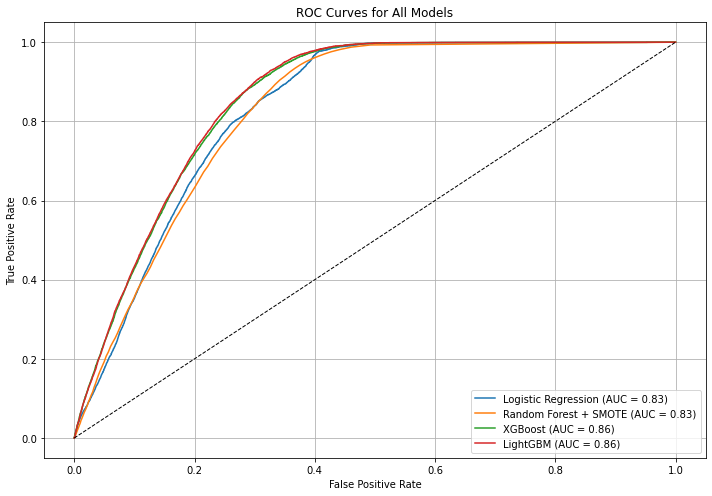

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_val, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb.predict_proba(X_val)[:, 1])
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, lgbm.predict_proba(X_val)[:, 1])
# fpr_rf_model, tpr_rf_model, _ = roc_curve(y_val, y_proba)  # from rf_model on X_val_selected

# Calculate AUC scores
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)


# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest + SMOTE (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.2f})')


# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Model Performance Comparison

In [95]:


# Create a DataFrame to hold the model performance data
performance_data = {
    "Model": ["Logistic Regression", "XGBoost", "Random Forest", "LightGBM "],
    "Accuracy": [0.88, 0.72, 0.69, 0.70],
    "Class 1 Recall": [0.00, 0.90, 0.94, 0.93],
    "Class 1 Precision": [0.40, 0.29, 0.28, 0.28],
    "F1 Score (Class 1)": [0.00, 0.44, 0.43, 0.43],
    "ROC AUC": [0.8342, 0.8558, 0.8548, 0.8578]
}

performance_df = pd.DataFrame(performance_data)

# Display the table
performance_df


,Model,Accuracy,Class 1 Recall,Class 1 Precision,F1 Score (Class 1),ROC AUC
0,Logistic Regression,0.88,0.00,0.40,0.00,0.8342
1,XGBoost,0.72,0.90,0.29,0.44,0.8558
2,Random Forest,0.69,0.94,0.28,0.43,0.8548
3,LightGBM,0.70,0.93,0.28,0.43,0.8578


### Choosing the best Model
From the above, predicting who will respond positively is more important than just getting high overall accuracy. Therefore, we will keep a close eye on;                                                                                                  
 
* Model with High recall and precision on class 1 (the minority class).                                                           
                                                                                                                           
* Good AUC (how well the model separates the classes).

Therefore, based on the scores from the above table **LightGBM** is the best model because of the following reasons;

* Highest ROC AUC = 0.8578 → best class separation overall.

* Highest recall on class 1 = 0.93 → captures most positive responders.

* F1-score and precision similar to XGBoost and Random Forest → fair balance.

* Good overall trade-off between performance and interpretability.

* Can be made faster and lighter in deployment.

### Business recommendations
1. Use LightGBM model for production deployment since it offers better performance with fewer resources and handles imbalanced data well.     



2. Focus personalized campaigns on mid-aged groups (30–50s). Also consider education campaigns or beginner-friendly policies for younger groups.        




3. Prioritize the top-performing channels such as channel 152 and 26 in underperforming regions so as to improve marketing. However ,enhance agent training and lead quality in high-traffic channels like 123 and 43.


4. Target Uninsured Customer since they show significantly higher response rates. Focus marketing campaigns and Allocating higher outreach budget to this segment will result to a  better ROI.

### Next Steps
1. Model Deployment
Deploy the LightGBM model into production to predict customer responses in real-time.
Integrate the model with the marketing system to prioritize leads based on response probability.


2. A/B Testing of Campaigns
Run A/B tests using the model to compare targeted marketing (model-based) vs broad campaigns.
Measure conversion rates, cost per acquisition (CPA), and ROI improvements

### Conclusion
This project has provided valuable insights into customer response behavior and identified the key drivers behind successful insurance policy conversions. 

Through predictive modeling, we uncovered that LightGBM model emerged as the best-performing algorithm, with strong recall for the positive class and the highest ROC AUC, making it well-suited for real-world deployment.

With the model in place, the organization can now proactively target high-value leads, reduce acquisition costs, and improve policy uptake rates.
